In [1]:
#loading libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [52]:
#loading the dataset into a dataframe and replacing '?' values with NA
cc_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",na_values='?')
cc_data.describe()

,8,?,?.1,1,0.19,0.33,0.02,0.9,0.12,0.17,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
count,1993.000000,820.000000,817.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,318.000000,318.000000,318.000000,318.000000,1993.000000,318.000000,1993.000000
mean,28.693929,58.826829,46188.336597,5.496237,0.057526,0.463462,0.179709,0.753643,0.153698,0.144009,...,0.065203,0.232840,0.161666,0.163428,0.076824,0.697956,0.440252,0.093939,0.195252,0.237998
std,16.395117,126.420560,25299.726569,2.872650,0.126903,0.163731,0.253480,0.244079,0.208929,0.232549,...,0.109480,0.203142,0.229111,0.215038,0.140413,0.213981,0.406434,0.240335,0.164948,0.233042
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.155000,0.150000
75%,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.197500,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
cc_data.ndim
cc_data.shape
print(cc_data)

       8      ?      ?.1            Lakewoodcity   1  0.19  0.33  0.02   0.9  \
0     53    NaN      NaN             Tukwilacity   1  0.00  0.16  0.12  0.74   
1     24    NaN      NaN            Aberdeentown   1  0.00  0.42  0.49  0.56   
2     34    5.0  81440.0     Willingborotownship   1  0.04  0.77  1.00  0.08   
3     42   95.0   6096.0       Bethlehemtownship   1  0.01  0.55  0.02  0.95   
4      6    NaN      NaN       SouthPasadenacity   1  0.02  0.28  0.06  0.54   
5     44    7.0  41500.0             Lincolntown   1  0.01  0.39  0.00  0.98   
6      6    NaN      NaN               Selmacity   1  0.01  0.74  0.03  0.46   
7     21    NaN      NaN           Hendersoncity   1  0.03  0.34  0.20  0.84   
8     29    NaN      NaN             Claytoncity   1  0.01  0.40  0.06  0.87   
9      6    NaN      NaN            DalyCitycity   1  0.13  0.71  0.15  0.07   
10    36    NaN      NaN  RockvilleCentrevillage   1  0.02  0.46  0.08  0.91   
11    25   21.0  44105.0             Nee

In [54]:
#to find whether NA or missing values in the dataset
cc_data.isna()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
6,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
7,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
8,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False
9,False,True,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,False


In [55]:
#cc_data = cc_data[(cc_data != '?').all(axis=1)]
#Replacing NA values with mean of that column
col_means = cc_data.mean()
cc_data = cc_data.fillna(col_means)
cc_data.shape
#cc_data[3] = cc_data[3].cat.codes
#print(cc_data)
#cc_data.isna()

(1993, 128)

In [56]:
#Prepare the data you loaded as a tensor suitable for a neural network
#creating a tensor from dataframe
cc_tensor = array(cc_data)


In [57]:
print(cc_tensor.shape)
type(cc_tensor)
print(cc_tensor)
type(cc_tensor)

(1993, 128)
[[53 58.826829268292684 46188.33659730722 ... 0.0 0.19525157232704396
  0.67]
 [24 58.826829268292684 46188.33659730722 ... 0.0 0.19525157232704396
  0.43]
 [34 5.0 81440.0 ... 0.0 0.19525157232704396 0.12]
 ...
 [9 9.0 80070.0 ... 0.91 0.28 0.23]
 [25 17.0 72600.0 ... 0.22 0.18 0.19]
 [6 58.826829268292684 46188.33659730722 ... 1.0 0.13 0.48]]


numpy.ndarray

In [58]:
#from sklearn.preprocessing import OneHotEncoder

#define load crime data function to split data into training and testing subsets
def load_crime_data(array2):
    X = cc_tensor[:,5:127] #dropping features which are non-predictive as mentioned in the UCI repository(cols0-4) 
    y = cc_tensor[:,127]
#    encoder = OneHotEncoder(sparse=False)
#    X = encoder.fit_transform(X)
#    X = encoder.fit_transform(X)
    ind = np.arange(0,len(X),1)
    np.random.shuffle(ind)
    X_train3=X[ind[0:1600]]
    X_test3=X[ind[1600:1993]]
    y_train3=y[ind[0:1600]]
    y_test3=y[ind[1600:1993]]
    return X_train3, X_test3, y_train3, y_test3

#function call to load crime data and split data
X_train3, X_test3, y_train3, y_test3=load_crime_data(cc_tensor)
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)
print(y_train3)
print(X_train3)

(1600, 122)
(1600,)
(393, 122)
(393,)
[0.09 0.1 0.02 ... 0.6 0.08 0.04]
[[0.04 0.53 0.36 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.01 0.49 0.26 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.0 0.47 0.0 ... 0.44025157232704404 0.0 0.19525157232704396]
 ...
 [0.08 0.3 0.19 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.1 0.34 0.03 ... 0.0 1.0 0.12]
 [0.0 0.67 0.01 ... 0.44025157232704404 0.0 0.19525157232704396]]


In [63]:
#load keras libraries for using sequential model and layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#perform k‐fold cross validation

cv = KFold(5, shuffle=True, random_state=20)
y_actual=[]
y_predicted=[]
average_valid_score = []
no_of_folds = 0
avg_valid_score=0
for train, valid in cv.split(X_train3):
    y_predicted=[]
    y_actual=[]
    k_X_train = X_train3[train]
    k_X_valid = X_train3[valid]
    k_y_train = y_train3[train]
    k_y_valid = y_train3[valid]
    print(k_X_train)
    cc_model = Sequential()
    cc_model.add(Dense(64, activation = 'relu', input_dim=122))
    cc_model.add(Dense(32, activation = 'relu'))
    cc_model.add(Dense(16, activation = 'relu'))
    cc_model.add(Dense(8, activation = 'relu'))
    cc_model.add(Dense(1, activation = 'linear'))
    #using SGD for optimization
    stoc_grad_desc3 = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    #load keras libraries for using sequential model and layers
    #using mean squared error as loss function for the model
    cc_model.compile(loss='mean_squared_error', optimizer=stoc_grad_desc3, metrics=['mean_absolute_error'])   
#    cc_model.summary() 
    #training the model
    training_hist3 = cc_model.fit(k_X_train, k_y_train, batch_size=100, epochs = 100,  verbose=2, validation_data=(k_X_valid, k_y_valid))
    predictions = cc_model.predict(k_X_valid)
    y_actual.append(k_y_valid)
    y_actual = np.asarray(y_actual)
    y_predicted.append(predictions)
    y_predicted = np.asarray(y_predicted)
    mserr = (1/len(X_train3)) * np.sum((y_predicted - y_actual)**2)
    valid_score=np.sqrt(mserr)
    average_valid_score.append(valid_score)
    avg_valid_score=avg_valid_score + valid_score
    no_of_folds=no_of_folds+1
    print("Fold", no_of_folds)
    print("Validation error for this fold", valid_score)


[[0.04 0.53 0.36 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.01 0.49 0.26 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.0 0.47 0.0 ... 0.44025157232704404 0.0 0.19525157232704396]
 ...
 [0.0 0.9 0.0 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.08 0.3 0.19 ... 0.44025157232704404 0.0 0.19525157232704396]
 [0.1 0.34 0.03 ... 0.0 1.0 0.12]]
Train on 1280 samples, validate on 320 samples
Epoch 1/100
 - 1s - loss: 0.1699 - mean_absolute_error: 0.3316 - val_loss: 0.0875 - val_mean_absolute_error: 0.1954
Epoch 2/100
 - 0s - loss: 0.0794 - mean_absolute_error: 0.1804 - val_loss: 0.0642 - val_mean_absolute_error: 0.1598
Epoch 3/100
 - 0s - loss: 0.0641 - mean_absolute_error: 0.1678 - val_loss: 0.0560 - val_mean_absolute_error: 0.1589
Epoch 4/100
 - 0s - loss: 0.0581 - mean_absolute_error: 0.1686 - val_loss: 0.0523 - val_mean_absolute_error: 0.1604
Epoch 5/100
 - 0s - loss: 0.0551 - mean_absolute_error: 0.1701 - val_loss: 0.0506 - val_mean_absolute_error: 0.1614
Epoch 6/1

Epoch 68/100
 - 0s - loss: 0.0228 - mean_absolute_error: 0.1066 - val_loss: 0.0226 - val_mean_absolute_error: 0.1066
Epoch 69/100
 - 0s - loss: 0.0227 - mean_absolute_error: 0.1059 - val_loss: 0.0225 - val_mean_absolute_error: 0.1065
Epoch 70/100
 - 0s - loss: 0.0226 - mean_absolute_error: 0.1057 - val_loss: 0.0224 - val_mean_absolute_error: 0.1069
Epoch 71/100
 - 0s - loss: 0.0224 - mean_absolute_error: 0.1059 - val_loss: 0.0223 - val_mean_absolute_error: 0.1064
Epoch 72/100
 - 0s - loss: 0.0223 - mean_absolute_error: 0.1052 - val_loss: 0.0222 - val_mean_absolute_error: 0.1061
Epoch 73/100
 - 0s - loss: 0.0222 - mean_absolute_error: 0.1053 - val_loss: 0.0221 - val_mean_absolute_error: 0.1063
Epoch 74/100
 - 0s - loss: 0.0221 - mean_absolute_error: 0.1050 - val_loss: 0.0220 - val_mean_absolute_error: 0.1053
Epoch 75/100
 - 0s - loss: 0.0220 - mean_absolute_error: 0.1044 - val_loss: 0.0219 - val_mean_absolute_error: 0.1057
Epoch 76/100
 - 0s - loss: 0.0219 - mean_absolute_error: 0.1044 

 - 0s - loss: 0.0233 - mean_absolute_error: 0.1072 - val_loss: 0.0246 - val_mean_absolute_error: 0.1152
Epoch 35/100
 - 0s - loss: 0.0231 - mean_absolute_error: 0.1063 - val_loss: 0.0245 - val_mean_absolute_error: 0.1143
Epoch 36/100
 - 0s - loss: 0.0230 - mean_absolute_error: 0.1058 - val_loss: 0.0242 - val_mean_absolute_error: 0.1148
Epoch 37/100
 - 0s - loss: 0.0228 - mean_absolute_error: 0.1058 - val_loss: 0.0241 - val_mean_absolute_error: 0.1141
Epoch 38/100
 - 0s - loss: 0.0226 - mean_absolute_error: 0.1055 - val_loss: 0.0240 - val_mean_absolute_error: 0.1139
Epoch 39/100
 - 0s - loss: 0.0225 - mean_absolute_error: 0.1048 - val_loss: 0.0238 - val_mean_absolute_error: 0.1134
Epoch 40/100
 - 0s - loss: 0.0224 - mean_absolute_error: 0.1041 - val_loss: 0.0237 - val_mean_absolute_error: 0.1130
Epoch 41/100
 - 0s - loss: 0.0223 - mean_absolute_error: 0.1045 - val_loss: 0.0235 - val_mean_absolute_error: 0.1131
Epoch 42/100
 - 0s - loss: 0.0221 - mean_absolute_error: 0.1039 - val_loss: 0

Train on 1280 samples, validate on 320 samples
Epoch 1/100
 - 1s - loss: 0.0690 - mean_absolute_error: 0.2068 - val_loss: 0.0586 - val_mean_absolute_error: 0.1927
Epoch 2/100
 - 0s - loss: 0.0629 - mean_absolute_error: 0.1881 - val_loss: 0.0537 - val_mean_absolute_error: 0.1795
Epoch 3/100
 - 0s - loss: 0.0586 - mean_absolute_error: 0.1786 - val_loss: 0.0501 - val_mean_absolute_error: 0.1736
Epoch 4/100
 - 0s - loss: 0.0549 - mean_absolute_error: 0.1743 - val_loss: 0.0477 - val_mean_absolute_error: 0.1710
Epoch 5/100
 - 0s - loss: 0.0520 - mean_absolute_error: 0.1709 - val_loss: 0.0458 - val_mean_absolute_error: 0.1682
Epoch 6/100
 - 0s - loss: 0.0497 - mean_absolute_error: 0.1680 - val_loss: 0.0445 - val_mean_absolute_error: 0.1658
Epoch 7/100
 - 0s - loss: 0.0479 - mean_absolute_error: 0.1644 - val_loss: 0.0432 - val_mean_absolute_error: 0.1627
Epoch 8/100
 - 0s - loss: 0.0463 - mean_absolute_error: 0.1608 - val_loss: 0.0420 - val_mean_absolute_error: 0.1597
Epoch 9/100
 - 0s - loss:

Epoch 71/100
 - 0s - loss: 0.0201 - mean_absolute_error: 0.1002 - val_loss: 0.0246 - val_mean_absolute_error: 0.1105
Epoch 72/100
 - 0s - loss: 0.0200 - mean_absolute_error: 0.0994 - val_loss: 0.0245 - val_mean_absolute_error: 0.1098
Epoch 73/100
 - 0s - loss: 0.0200 - mean_absolute_error: 0.0992 - val_loss: 0.0245 - val_mean_absolute_error: 0.1100
Epoch 74/100
 - 0s - loss: 0.0199 - mean_absolute_error: 0.0991 - val_loss: 0.0245 - val_mean_absolute_error: 0.1098
Epoch 75/100
 - 0s - loss: 0.0198 - mean_absolute_error: 0.0989 - val_loss: 0.0244 - val_mean_absolute_error: 0.1098
Epoch 76/100
 - 0s - loss: 0.0198 - mean_absolute_error: 0.0991 - val_loss: 0.0244 - val_mean_absolute_error: 0.1098
Epoch 77/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0989 - val_loss: 0.0243 - val_mean_absolute_error: 0.1095
Epoch 78/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0988 - val_loss: 0.0243 - val_mean_absolute_error: 0.1095
Epoch 79/100
 - 0s - loss: 0.0196 - mean_absolute_error: 0.0983 

 - 0s - loss: 0.0263 - mean_absolute_error: 0.1153 - val_loss: 0.0231 - val_mean_absolute_error: 0.1082
Epoch 38/100
 - 0s - loss: 0.0261 - mean_absolute_error: 0.1142 - val_loss: 0.0229 - val_mean_absolute_error: 0.1072
Epoch 39/100
 - 0s - loss: 0.0259 - mean_absolute_error: 0.1134 - val_loss: 0.0228 - val_mean_absolute_error: 0.1067
Epoch 40/100
 - 0s - loss: 0.0258 - mean_absolute_error: 0.1130 - val_loss: 0.0227 - val_mean_absolute_error: 0.1063
Epoch 41/100
 - 0s - loss: 0.0256 - mean_absolute_error: 0.1131 - val_loss: 0.0226 - val_mean_absolute_error: 0.1069
Epoch 42/100
 - 0s - loss: 0.0255 - mean_absolute_error: 0.1125 - val_loss: 0.0225 - val_mean_absolute_error: 0.1059
Epoch 43/100
 - 0s - loss: 0.0253 - mean_absolute_error: 0.1117 - val_loss: 0.0224 - val_mean_absolute_error: 0.1056
Epoch 44/100
 - 0s - loss: 0.0252 - mean_absolute_error: 0.1119 - val_loss: 0.0223 - val_mean_absolute_error: 0.1062
Epoch 45/100
 - 0s - loss: 0.0251 - mean_absolute_error: 0.1123 - val_loss: 0

Epoch 3/100
 - 0s - loss: 0.0624 - mean_absolute_error: 0.1747 - val_loss: 0.0706 - val_mean_absolute_error: 0.1886
Epoch 4/100
 - 0s - loss: 0.0580 - mean_absolute_error: 0.1742 - val_loss: 0.0670 - val_mean_absolute_error: 0.1891
Epoch 5/100
 - 0s - loss: 0.0554 - mean_absolute_error: 0.1742 - val_loss: 0.0642 - val_mean_absolute_error: 0.1878
Epoch 6/100
 - 0s - loss: 0.0531 - mean_absolute_error: 0.1728 - val_loss: 0.0613 - val_mean_absolute_error: 0.1853
Epoch 7/100
 - 0s - loss: 0.0508 - mean_absolute_error: 0.1708 - val_loss: 0.0585 - val_mean_absolute_error: 0.1822
Epoch 8/100
 - 0s - loss: 0.0486 - mean_absolute_error: 0.1687 - val_loss: 0.0554 - val_mean_absolute_error: 0.1785
Epoch 9/100
 - 0s - loss: 0.0465 - mean_absolute_error: 0.1668 - val_loss: 0.0525 - val_mean_absolute_error: 0.1752
Epoch 10/100
 - 0s - loss: 0.0443 - mean_absolute_error: 0.1648 - val_loss: 0.0497 - val_mean_absolute_error: 0.1716
Epoch 11/100
 - 0s - loss: 0.0421 - mean_absolute_error: 0.1619 - val_l

 - 0s - loss: 0.0198 - mean_absolute_error: 0.0984 - val_loss: 0.0229 - val_mean_absolute_error: 0.1023
Epoch 74/100
 - 0s - loss: 0.0198 - mean_absolute_error: 0.0984 - val_loss: 0.0229 - val_mean_absolute_error: 0.1023
Epoch 75/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0982 - val_loss: 0.0229 - val_mean_absolute_error: 0.1022
Epoch 76/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0980 - val_loss: 0.0229 - val_mean_absolute_error: 0.1022
Epoch 77/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0980 - val_loss: 0.0229 - val_mean_absolute_error: 0.1022
Epoch 78/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0982 - val_loss: 0.0228 - val_mean_absolute_error: 0.1021
Epoch 79/100
 - 0s - loss: 0.0197 - mean_absolute_error: 0.0980 - val_loss: 0.0229 - val_mean_absolute_error: 0.1020
Epoch 80/100
 - 0s - loss: 0.0196 - mean_absolute_error: 0.0976 - val_loss: 0.0229 - val_mean_absolute_error: 0.1020
Epoch 81/100
 - 0s - loss: 0.0196 - mean_absolute_error: 0.0975 - val_loss: 0

Text(0, 0.5, 'loss')

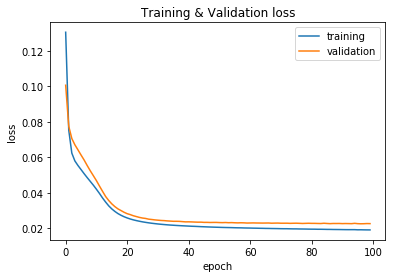

In [65]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist3.history['loss'])
plt.plot(training_hist3.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'mean_absolute_error')

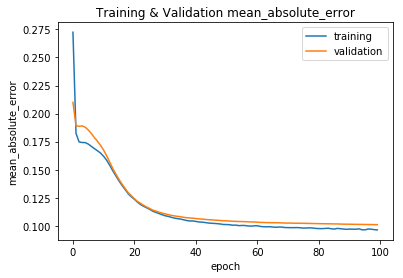

In [66]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist3.history['mean_absolute_error'])
plt.plot(training_hist3.history['val_mean_absolute_error'])
plt.title('Training & Validation mean_absolute_error')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')

In [67]:
#calculate average validation error over all folds
avg_valid_score=avg_valid_score/5    
#y_actual = np.concatenate(y_actual)
#y_predicted = np.concatenate(y_predicted)   
#average_valid_score = np.sqrt(metrics.mean_squared_error(y_predicted, y_actual))
print("Validation score across all k-folds is", avg_valid_score)
print("Validation score for each fold is", average_valid_score)


Validation score across all k-folds is 2.3746359917411937
Validation score for each fold is [2.342995634211883, 2.497788319752356, 2.2313512067842236, 2.2797572189388715, 2.521287579018633]


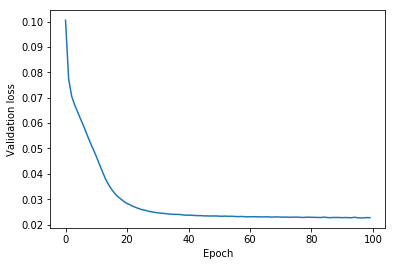

In [68]:
import matplotlib.pyplot as plt

#plt.title("Validation error")
plt.plot(training_hist3.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()

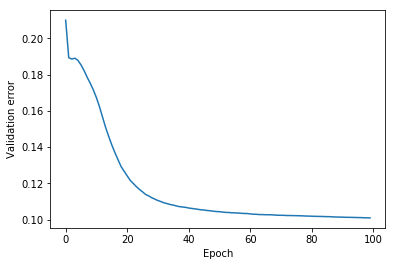

In [69]:
#plt.title("Validation error")

plt.plot(training_hist3.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("Validation error")
plt.show()

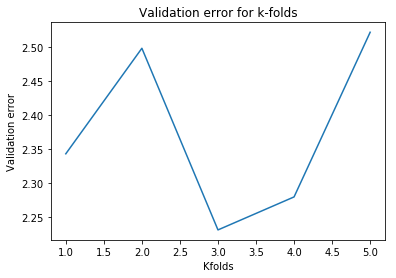

In [70]:
kfolds=[1, 2, 3, 4, 5]
plt.title("Validation error for k-folds")
plt.plot(kfolds,average_valid_score)
plt.xlabel("Kfolds")
plt.ylabel("Validation error")
plt.show()

In [71]:
#Evaluating the model on test data 
loss_mae_score3 = cc_model.evaluate(X_test3, y_test3)#, batch_size=100, verbose=2)
print("Loss ", loss_mae_score3[0] )
print("Mean Absolute error:",loss_mae_score3[1])

393/393 [==============================] - 0s 82us/step
Loss  0.02082267655746931
Mean Absolute error: 0.1025899809052926


In [72]:
#training the model with the whole training data data
training_hist3 = cc_model.fit(X_train3, y_train3, batch_size=100, epochs = 50,  verbose=2, validation_split=0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/50
 - 0s - loss: 0.0196 - mean_absolute_error: 0.0975 - val_loss: 0.0209 - val_mean_absolute_error: 0.0992
Epoch 2/50
 - 0s - loss: 0.0195 - mean_absolute_error: 0.0974 - val_loss: 0.0210 - val_mean_absolute_error: 0.0992
Epoch 3/50
 - 0s - loss: 0.0195 - mean_absolute_error: 0.0971 - val_loss: 0.0210 - val_mean_absolute_error: 0.0989
Epoch 4/50
 - 0s - loss: 0.0194 - mean_absolute_error: 0.0972 - val_loss: 0.0210 - val_mean_absolute_error: 0.0996
Epoch 5/50
 - 0s - loss: 0.0194 - mean_absolute_error: 0.0974 - val_loss: 0.0211 - val_mean_absolute_error: 0.0995
Epoch 6/50
 - 0s - loss: 0.0194 - mean_absolute_error: 0.0970 - val_loss: 0.0211 - val_mean_absolute_error: 0.0990
Epoch 7/50
 - 0s - loss: 0.0194 - mean_absolute_error: 0.0973 - val_loss: 0.0211 - val_mean_absolute_error: 0.0999
Epoch 8/50
 - 0s - loss: 0.0193 - mean_absolute_error: 0.0971 - val_loss: 0.0211 - val_mean_absolute_error: 0.0992
Epoch 9/50
 - 0s - loss: 0.0193 -

In [73]:
#Evaluating the model on test data after retraining the model with t
loss_mae_score3 = cc_model.evaluate(X_test3, y_test3)#, batch_size=100, verbose=2)
print("Loss ", loss_mae_score3[0] )
print("Mean Absolute error:",loss_mae_score3[1])

393/393 [==============================] - 0s 84us/step
Loss  0.02041274800176232
Mean Absolute error: 0.10190942394369432


In [75]:
#save the model 
cc_model.save("My_fully_connected_cc3")
cc_model.save_weights("Model_weights3.h5")
load_cc_model = cc_model.load_weights("Model_weights3.h5")